In [3]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#from xgboost import XGBRegressor

In [12]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return pd.read_csv(filename, delimiter=',')

In [13]:
train = load_data('data/train_2008.csv')
test = load_data('data/test_2008.csv')

In [25]:
train.head()

id  HRMONTH  HRYEAR4  HURESPLI  HUFINAL  HUSPNISH  HETENURE  HEHOUSUT  \
0  16000       11     2008         1      201         0         1         1   
1  16001       11     2008         1      201         0         2         1   
2  16002       11     2008         1        1         0         1         1   
3  16003       11     2008         2        1         0         1         1   
4  16004       11     2008         2      201         0         1         1   

   HETELHHD  HETELAVL  ...  PEDISDRS  PEDISOUT  PRDISFLG  PXDISEAR  PXDISEYE  \
0         1        -1  ...         2         2         2         0         0   
1         1        -1  ...         2         2         2         0         0   
2         1        -1  ...         2         2         2         0         0   
3         1        -1  ...         2         2         2         0         0   
4         1        -1  ...         2         2         2         0         0   

   PXDISREM  PXDISPHY  PXDISDRS  PXDISOUT  target  
0         0         0         0         0       0  
1         0         0         0         0       0  
2         0         0         0         0       0  
3         0         0         0         0       0  
4         0         0         0         0       0  

[5 rows x 383 columns]

In [26]:
train.shape

(64667, 383)

In [27]:
# delete columns with only one unique value
for column in train:
    if train[column].nunique() == 1:
        train = train.drop([column], axis=1)

In [29]:
train.shape

(64667, 368)

In [31]:
train.head()

id  HURESPLI  HUFINAL  HUSPNISH  HETENURE  HEHOUSUT  HETELHHD  HETELAVL  \
0  16000         1      201         0         1         1         1        -1   
1  16001         1      201         0         2         1         1        -1   
2  16002         1        1         0         1         1         1        -1   
3  16003         2        1         0         1         1         1        -1   
4  16004         2      201         0         1         1         1        -1   

   HEPHONEO  HUFAMINC  ...  PEDISDRS  PEDISOUT  PRDISFLG  PXDISEAR  PXDISEYE  \
0         1        16  ...         2         2         2         0         0   
1         1         6  ...         2         2         2         0         0   
2         1        15  ...         2         2         2         0         0   
3         1        13  ...         2         2         2         0         0   
4         1        -3  ...         2         2         2         0         0   

   PXDISREM  PXDISPHY  PXDISDRS  PXDISOUT  target  
0         0         0         0         0       0  
1         0         0         0         0       0  
2         0         0         0         0       0  
3         0         0         0         0       0  
4         0         0         0         0       0  

[5 rows x 368 columns]

In [33]:
train = train.drop(['id'], axis=1)

In [34]:
train.head()

HURESPLI  HUFINAL  HUSPNISH  HETENURE  HEHOUSUT  HETELHHD  HETELAVL  \
0         1      201         0         1         1         1        -1   
1         1      201         0         2         1         1        -1   
2         1        1         0         1         1         1        -1   
3         2        1         0         1         1         1        -1   
4         2      201         0         1         1         1        -1   

   HEPHONEO  HUFAMINC  HUTYPB  ...  PEDISDRS  PEDISOUT  PRDISFLG  PXDISEAR  \
0         1        16      -1  ...         2         2         2         0   
1         1         6      -1  ...         2         2         2         0   
2         1        15      -1  ...         2         2         2         0   
3         1        13      -1  ...         2         2         2         0   
4         1        -3      -1  ...         2         2         2         0   

   PXDISEYE  PXDISREM  PXDISPHY  PXDISDRS  PXDISOUT  target  
0         0         0         0         0         0       0  
1         0         0         0         0         0       0  
2         0         0         0         0         0       0  
3         0         0         0         0         0       0  
4         0         0         0         0         0       0  

[5 rows x 367 columns]

In [35]:
train.columns

Index(['HURESPLI', 'HUFINAL', 'HUSPNISH', 'HETENURE', 'HEHOUSUT', 'HETELHHD',
       'HETELAVL', 'HEPHONEO', 'HUFAMINC', 'HUTYPB',
       ...
       'PEDISDRS', 'PEDISOUT', 'PRDISFLG', 'PXDISEAR', 'PXDISEYE', 'PXDISREM',
       'PXDISPHY', 'PXDISDRS', 'PXDISOUT', 'target'],
      dtype='object', length=367)

In [36]:
# get target col
target = train.loc[:,'target']

target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [38]:
# try with smaller sample first
sub_train = train.loc[:,'HURESPLI':'HUFAMINC']
sub_train['target'] = target

In [39]:
sub_train.head()

HURESPLI  HUFINAL  HUSPNISH  HETENURE  HEHOUSUT  HETELHHD  HETELAVL  \
0         1      201         0         1         1         1        -1   
1         1      201         0         2         1         1        -1   
2         1        1         0         1         1         1        -1   
3         2        1         0         1         1         1        -1   
4         2      201         0         1         1         1        -1   

   HEPHONEO  HUFAMINC  target  
0         1        16       0  
1         1         6       0  
2         1        15       0  
3         1        13       0  
4         1        -3       0

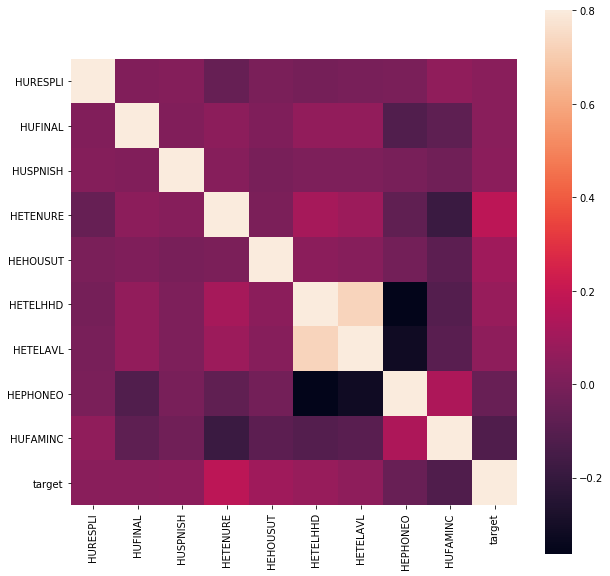

In [40]:
C_mat = sub_train.corr()
fig = plt.figure(figsize = (10,10))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [45]:
C_mat = train.corr()
fig = plt.figure(figsize = (20,20), dpi=1000)

sb.heatmap(C_mat, vmax = .8, square = True)
plt.savefig('large.png')
plt.show()

In [46]:
train = train.drop(['target'], axis=1)

In [47]:
train.insert(loc=0, column='target', value=target)

In [48]:
train.head()

target  HURESPLI  HUFINAL  HUSPNISH  HETENURE  HEHOUSUT  HETELHHD  \
0       0         1      201         0         1         1         1   
1       0         1      201         0         2         1         1   
2       0         1        1         0         1         1         1   
3       0         2        1         0         1         1         1   
4       0         2      201         0         1         1         1   

   HETELAVL  HEPHONEO  HUFAMINC  ...  PEDISPHY  PEDISDRS  PEDISOUT  PRDISFLG  \
0        -1         1        16  ...         2         2         2         2   
1        -1         1         6  ...         2         2         2         2   
2        -1         1        15  ...         2         2         2         2   
3        -1         1        13  ...         2         2         2         2   
4        -1         1        -3  ...         2         2         2         2   

   PXDISEAR  PXDISEYE  PXDISREM  PXDISPHY  PXDISDRS  PXDISOUT  
0         0         0         0         0         0         0  
1         0         0         0         0         0         0  
2         0         0         0         0         0         0  
3         0         0         0         0         0         0  
4         0         0         0         0         0         0  

[5 rows x 367 columns]

In [49]:
C_mat = train.corr()
fig = plt.figure(figsize = (20,20), dpi=1000)

sb.heatmap(C_mat, vmax = .8, square = True)
plt.savefig('large2.png')
plt.show()

In [50]:
from sklearn.feature_selection import f_regression

In [51]:
x_val = train.drop(['target'], axis=1)
y_val = target

In [52]:
x_val.head()

HURESPLI  HUFINAL  HUSPNISH  HETENURE  HEHOUSUT  HETELHHD  HETELAVL  \
0         1      201         0         1         1         1        -1   
1         1      201         0         2         1         1        -1   
2         1        1         0         1         1         1        -1   
3         2        1         0         1         1         1        -1   
4         2      201         0         1         1         1        -1   

   HEPHONEO  HUFAMINC  HUTYPB  ...  PEDISPHY  PEDISDRS  PEDISOUT  PRDISFLG  \
0         1        16      -1  ...         2         2         2         2   
1         1         6      -1  ...         2         2         2         2   
2         1        15      -1  ...         2         2         2         2   
3         1        13      -1  ...         2         2         2         2   
4         1        -3      -1  ...         2         2         2         2   

   PXDISEAR  PXDISEYE  PXDISREM  PXDISPHY  PXDISDRS  PXDISOUT  
0         0         0         0         0         0         0  
1         0         0         0         0         0         0  
2         0         0         0         0         0         0  
3         0         0         0         0         0         0  
4         0         0         0         0         0         0  

[5 rows x 366 columns]

In [53]:
y_val.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [54]:
feature_names = list(x_val.columns.values)

In [56]:
from sklearn.feature_selection import SelectKBest

In [61]:
select_k_best_classifier = SelectKBest(score_func=f_regression, k=10)
fit_trans_features = select_k_best_classifier.fit_transform(x_val, y_val)

In [62]:
mask = select_k_best_classifier.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

In [63]:
output = pd.DataFrame(fit_trans_features, columns=new_features)

In [64]:
output.head()

HETENURE  PEAGE  PEMARITL  PESPOUSE  PEEDUCA  PRMARSTA  PESCHENR  PXSCHLVL  \
0         1     34         1         1       40         1        -1        -1   
1         2     28         1         1       37         1        -1        -1   
2         1     54         1         2       39         1        -1        -1   
3         1     27         1         1       43         1        -1        -1   
4         1     22         6        -1       43         7         2         1   

   PEDIPGED  PEGRPROF  
0        -1        -1  
1        -1        -1  
2         2        -1  
3        -1         2  
4        -1         2

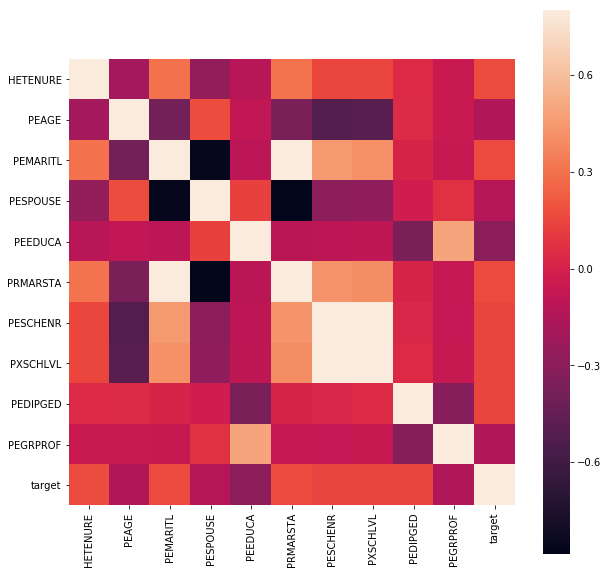

In [66]:
# now visualize!
# add target back first
final = output
final['target'] = target

C_mat = final.corr()
fig = plt.figure(figsize = (10,10))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.savefig('final.png')
plt.show()